In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [ ]:
% alpha = 0.00001; w_thresh = 20; leak = 0.2; fire_thresh = 10; wu_thresh =
% 100; achieved max 72% accuracy
% alpha = 0.00001; w_thresh = 20; leak = 0.5; fire_thresh = 10; wu_thresh =
% 100; got 76% accuracy

clc
close all
clear all

load("train_data_015.mat");
 W1 = rand(784,3);
j = 1;
A = zeros(12665,3);
count_zero =0;
ep = 1000;

% hyperparameters
alpha = 0.00001;
w_thresh = 20;     % if weight>w_thresh, weight = w_thresh
leak = 0.5;        % leaking in neuron   % 0.2
fire_thresh = 10;   % if the output from the neuron is greater than fire_threshold, it fires
wu_thresh = 100;   % if output from the neuron > wu_thresh, weight is updated

%parameter
% W1 = (w_thresh-0).*rand(784,3) + 0;

for k = 1:ep
    EPC=['Epoch#',num2str(k)];
    disp(EPC);
    
    acc = 0;    % counts accuracy in each epoch

for i = 1:100         % 10 training examples taken

    % input x weight
    AA = train_data_015(i,2:785);
    A_m = AA * W1;

    A(i,1) = A(i,1) + A_m(1,1);      % A is neuron output
    A(i,2) = A(i,2) + A_m(1,2);
    A(i,3) = A(i,3) + A_m(1,3);


if A(i,1)>wu_thresh                  % if output from the neuron > wu_thresh, weight is updated
    for kk = 1:784
         W1(kk,1) = W1(kk,1) + alpha.*A(i,1);
    end
else
     for kk = 1:784
         W1(kk,1) = W1(kk,1) - alpha.*A(i,1);
     end
end

if A(i,2)>wu_thresh                % if output from the neuron > wu_thresh, weight is updated
for kk=1:784
    W1(kk,2) = W1(kk,2) + alpha.*A(i,2);
end
else
    for kk=1:784
       W1(kk,2) = W1(kk,2) - alpha.*A(i,2);
    end
end

if A(i,3)>wu_thresh              % if output from the neuron > wu_thresh, weight is updated
for kk=1:784
    W1(kk,3) = W1(kk,3) + alpha.*A(i,3);
end
else
    for kk=1:784
    W1(kk,3) = W1(kk,3) - alpha.*A(i,3);
    end
end


 for j=1:784
     for nn=1:3
         if W1(j,nn)>w_thresh        % if weight>w_thresh, weight = w_thresh
             W1(j,nn) = w_thresh;
         end
         if W1(j,nn)<0
             W1(j,nn) = 0;
         end
     end
 end
 

for j = 1:3
if A(i,j)>=fire_thresh         % if the output from the neuron is greater than fire_threshold, it fires
    A(i,:) = 0;
else
    A(i,j) = A(i,j) - leak;
end
end

[val,predict(i)] = max(A(i,:));  % predict among three output neurons, which one has maximum value

if predict(i) == 1          % if 1st output neuron is maximum, it is predicted as 0
    predict(i) = 0;
elseif predict(i) == 2      % if 2nd output neuron is maximum, it is predicted as 1
    predict(i) = 1;
else
    predict(i) = 5;          % if 3rd output neuron is maximum, it is predicted as 5
end

 predict_store(i,1) = predict(i);


if (predict_store(i,1))==train_data_015(i,1)  % if predicted value matches with original value, increase acc
    acc = (acc + 1);
end

end
acc_plot(k) = (acc/100)*100;       % calculate accuracy in percentage

count_correct = 0;                % counts how many digits are predicted correctly

for i = 1:100
    comp(i,1) = train_data_015(i,1);  % 1st column of comp has the original digits 
    comp(i,2) = predict_store(i,1);   % 2nd column of comp has the predicted digits 

    if comp(i,1) == comp(i,2)    % if predicted and original match, increase the count of correct digit
            count_correct = count_correct + 1;  
    end
end

    count_correct_store(k,1) = count_correct; % holds the #correct digit in each epoch

    if acc_plot(k) >= 70    % if the accuracy>=70, save the predicted and original digits separately
        comp_s = comp;
    end

end
figure(1)
plot(1:k,acc_plot,"b-o")

In [23]:
from tensorflow.keras.datasets import mnist

In [45]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [46]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 5))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 5))

In [47]:
train_filter_0 = np.where(Y_train == 0)
test_filter_0 = np.where(Y_test == 0)

X_train_filter_0 , Y_train_filter_0 = X_train[train_filter_0],Y_train[train_filter_0]
X_test_filter_0 , Y_test_filter_0 = X_test[test_filter_0] , Y_test[test_filter_0]

In [48]:
train_filter_1 = np.where(Y_train == 1)
test_filter_1 = np.where(Y_test == 1)

X_train_filter_1 , Y_train_filter_1 = X_train[train_filter_1],Y_train[train_filter_1]
X_test_filter_1 , Y_test_filter_1 = X_test[test_filter_1] , Y_test[test_filter_1]

In [49]:
train_filter_5 = np.where(Y_train == 5)
test_filter_5 = np.where(Y_test == 5)

X_train_filter_5 , Y_train_filter_5 = X_train[train_filter_5],Y_train[train_filter_5]
X_test_filter_5 , Y_test_filter_5 = X_test[test_filter_5] , Y_test[test_filter_5]

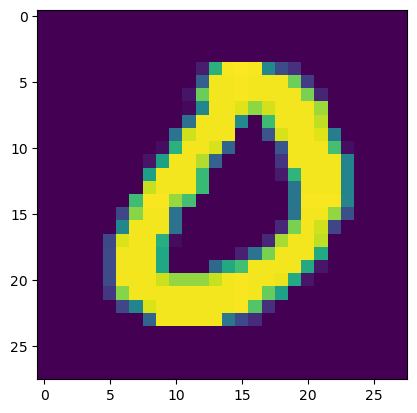

In [54]:
plt.imshow(X_train_filter_0[34])

In [53]:
Y_train_filter

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [51]:
flattenImage = []
Y_train_filter = []

for image_ in X_train_filter_0[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(0)

for image_ in X_train_filter_1[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(1)

for image_ in X_train_filter_5[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(5)

In [42]:
flattenImage, Y_train_filter = shuffle(flattenImage, Y_train_filter, random_state=0)

In [31]:
len(flattenImage)

99

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random

W1 = np.random.rand(784, 3)
A = np.zeros((99, 3))

# Hyperparameters
alpha = 0.00001
w_thresh = 20
leak = 0.5
fire_thresh = 10
wu_thresh = 1

ep = 1000

acc_plot = np.zeros(ep)

for k in range(ep):
    print("Epoch#", k+1)
    
    acc = 0

    for i in range(99):
        AA = flattenImage[i]
        A_m = np.dot(AA, W1)

        A[i][0] += A_m[0]
        A[i][1] += A_m[1]
        A[i][2] += A_m[2]

        if A[i][0] > wu_thresh:
            W1[:,0] += alpha * A[i][0]
        else:
            W1[:,0] -= alpha * A[i][0]

        if A[i][1] > wu_thresh:
            W1[:,1] += alpha * A[i][1]
        else:
            W1[:,1] -= alpha * A[i][1]

        if A[i][2] > wu_thresh:
            W1[:,2] += alpha * A[i][2]
        else:
            W1[:,2] -= alpha * A[i][2]

        W1[W1 > w_thresh] = w_thresh
        W1[W1 < 0] = 0

        for j in range(3):
            if A[i][j] >= fire_thresh:
                A[i][:] = 0
            else:
                A[i][j] -= leak

        predict = np.argmax(A[i][:])

        if predict == 0:
            predict = 0
        elif predict == 1:
            predict = 1
        else:
            predict = 5

        if predict == Y_train_filter[i]:
            acc += 1

    acc_plot[k] = (acc / 100) * 100

    count_correct = 0
    comp = np.zeros((99, 2))

    for i in range(99):
        comp[i, 0] = Y_train_filter[i]
        comp[i, 1] = predict

        if comp[i, 0] == comp[i, 1]:
            count_correct += 1

    count_correct_store = count_correct
    print(count_correct_store)

    if acc_plot[k] >= 70:
        comp_s = comp

plt.plot(range(1, ep + 1), acc_plot, "b-o")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

Epoch# 1
33
Epoch# 2
33
Epoch# 3
33
Epoch# 4
33
Epoch# 5
33
Epoch# 6
33
Epoch# 7
33
Epoch# 8
33
Epoch# 9
33
Epoch# 10
33
Epoch# 11
33
Epoch# 12
33
Epoch# 13
33
Epoch# 14
33
Epoch# 15
33
Epoch# 16
33
Epoch# 17
33
Epoch# 18
33
Epoch# 19
33
Epoch# 20
33
Epoch# 21
33
Epoch# 22
33
Epoch# 23
33
Epoch# 24
33
Epoch# 25
33
Epoch# 26
33
Epoch# 27
33
Epoch# 28
33
Epoch# 29
33
Epoch# 30
33
Epoch# 31
33
Epoch# 32
33
Epoch# 33
33
Epoch# 34
33
Epoch# 35
33
Epoch# 36
33
Epoch# 37
33
Epoch# 38
33
Epoch# 39
33
Epoch# 40
33
Epoch# 41
33
Epoch# 42
33
Epoch# 43
33
Epoch# 44
33
Epoch# 45
33
Epoch# 46
33
Epoch# 47
33
Epoch# 48
33
Epoch# 49
33
Epoch# 50
33
Epoch# 51
33
Epoch# 52
33
Epoch# 53
33
Epoch# 54
33
Epoch# 55
33
Epoch# 56
33
Epoch# 57
33
Epoch# 58
33
Epoch# 59
33
Epoch# 60
33
Epoch# 61
33
Epoch# 62
33
Epoch# 63
33
Epoch# 64
33
Epoch# 65
33
Epoch# 66
33
Epoch# 67
33
Epoch# 68
33
Epoch# 69
33
Epoch# 70
33
Epoch# 71
33
Epoch# 72
33
Epoch# 73
33
Epoch# 74
33
Epoch# 75
33
Epoch# 76
33
Epoch# 77
33
Epoch# 7

33
Epoch# 635
33
Epoch# 636
33
Epoch# 637
33
Epoch# 638
33
Epoch# 639
33
Epoch# 640
33
Epoch# 641
33
Epoch# 642
33
Epoch# 643
33
Epoch# 644
33
Epoch# 645
33
Epoch# 646
33
Epoch# 647
33
Epoch# 648
33
Epoch# 649
33
Epoch# 650
33
Epoch# 651
33
Epoch# 652
33
Epoch# 653
33
Epoch# 654
33
Epoch# 655
33
Epoch# 656
33
Epoch# 657
33
Epoch# 658
33
Epoch# 659
33
Epoch# 660
33
Epoch# 661
33
Epoch# 662
33
Epoch# 663
33
Epoch# 664
33
Epoch# 665
33
Epoch# 666
33
Epoch# 667
33
Epoch# 668
33
Epoch# 669
33
Epoch# 670
33
Epoch# 671
33
Epoch# 672
33
Epoch# 673
33
Epoch# 674
33
Epoch# 675
33
Epoch# 676
33
Epoch# 677
33
Epoch# 678
33
Epoch# 679
33
Epoch# 680
33
Epoch# 681
33
Epoch# 682
33
Epoch# 683
33
Epoch# 684
33
Epoch# 685
33
Epoch# 686
33
Epoch# 687
33
Epoch# 688
33
Epoch# 689
33
Epoch# 690
33
Epoch# 691
33
Epoch# 692
33
Epoch# 693
33
Epoch# 694
33
Epoch# 695
33
Epoch# 696
33
Epoch# 697
33
Epoch# 698
33
Epoch# 699
33
Epoch# 700
33
Epoch# 701
33
Epoch# 702
33
Epoch# 703
33
Epoch# 704
33
Epoch# 705
33
Epo

KeyboardInterrupt: 

In [ ]:
print(W1)

In [67]:
W1 = np.random.rand(784, 3)
print(W1)

[[0.27108295 0.04513163 0.59633298]
 [0.83408178 0.93476471 0.83561719]
 [0.06186669 0.29491784 0.80732788]
 ...
 [0.80878185 0.72541798 0.26940737]
 [0.23731971 0.19180955 0.48921681]
 [0.92487983 0.23037836 0.26469607]]


In [69]:
len(W1[:,0])

784